In [42]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.special import erf

In [43]:
url="https://covid19.isciii.es/resources/serie_historica_acumulados.csv"
t=requests.get(url).text
s=t.split("NOTA")[0]

In [44]:
#df=pd.read_csv('serie_historica_acumulados.csv', parse_dates=True)

In [45]:
df=pd.read_csv(io.StringIO(s), parse_dates=True)

In [46]:
df.fillna(0, inplace=True)

In [47]:
df['FECHA'] = pd.to_datetime(df['FECHA'],dayfirst=True)

In [48]:
df

,CCAA,FECHA,CASOS,Hospitalizados,UCI,Fallecidos,Recuperados
0,AN,2020-02-20,0.0,0.0,0.0,0.0,0.0
1,AR,2020-02-20,0.0,0.0,0.0,0.0,0.0
2,AS,2020-02-20,0.0,0.0,0.0,0.0,0.0
3,IB,2020-02-20,1.0,0.0,0.0,0.0,0.0
4,CN,2020-02-20,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
1003,MC,2020-04-12,1463.0,543.0,94.0,101.0,353.0
1004,NC,2020-04-12,4092.0,1693.0,124.0,239.0,695.0
1005,PV,2020-04-12,11018.0,5622.0,464.0,831.0,5026.0
1006,RI,2020-04-12,3358.0,1141.0,73.0,223.0,1458.0


In [49]:
#df=df[df['CCAA']=='GA']

In [50]:
df = df.groupby('FECHA')['UCI'].sum().to_frame()

In [51]:
df=df.sort_values(by='UCI')

In [52]:
df['Index'] = range(1, len(df) + 1)

In [53]:
df=df.set_index('Index')

In [54]:
df['Dif. UCI'] = df['UCI'] - df['UCI'].shift(1)

In [55]:
df.fillna(0, inplace=True)

In [56]:
df.drop('UCI', axis=1, inplace=True)

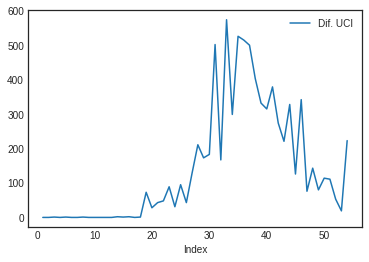

In [57]:
df.plot()

In [58]:
yData=df[df['Dif. UCI']>0].to_numpy()
yData=yData.reshape(yData.size)
xData=np.arange(yData.size)

In [59]:
yData

array([  1.,   1.,   1.,   2.,   1.,   2.,   1.,  73.,  28.,  43.,  48.,
        89.,  31.,  95.,  43., 129., 211., 173., 183., 502., 167., 574.,
       299., 526., 515., 500., 403., 332., 315., 379., 274., 221., 328.,
       126., 342.,  76., 143.,  80., 114., 111.,  53.,  19., 223.])

In [60]:
#Example of regression function - Polynomial
#def func(x, a ,b, c, d):
#    return a*np.exp(b*x)
#    return a+ b*x + c*pow(x,2)+ d*pow(x,3) #+ e*pow(x,4) + f*pow(x,5) + g*pow(x,6)

In [61]:
#Example of regression function
#def func(x, amp, cen, wid):
#    return amp * np.exp(-(x-cen)**2 / wid)

In [62]:
#Regression function - skew normal
def func(x, sigmag, mu, alpha,a):
    c = 0
    #normal distribution
    normpdf = (1/(sigmag*np.sqrt(2*np.pi)))*np.exp(-(np.power((x-mu),2)/(2*np.power(sigmag,2))))
    normcdf = (0.5*(1+erf((alpha*((x-mu)/sigmag))/(np.sqrt(2)))))
    return 2*a*normpdf*normcdf + c

In [63]:
popt, pcov = curve_fit(func, xData, yData, p0=(1,1,1,20000))
print(popt)
print(pcov)

[1.08588600e+01 1.80966211e+01 2.56515377e+00 7.67930912e+03]
[[ 2.19164767e+00 -1.16243185e+00  1.26427278e+00  3.55180260e+02]
 [-1.16243185e+00  8.77503336e-01 -7.59803351e-01 -1.57028669e+02]
 [ 1.26427278e+00 -7.59803351e-01  1.11173425e+00  7.38865795e+01]
 [ 3.55180260e+02 -1.57028669e+02  7.38865795e+01  2.65145616e+05]]


In [64]:
xFit = np.arange(0.0, yData.size + 10, 1)

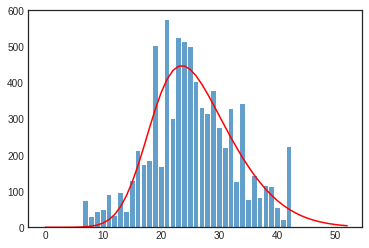

In [65]:
plt.style.use('seaborn-white')
plt.bar(xData, yData, align='center', alpha=0.7)
plt.plot(xFit, func(xFit, *popt), 'r')
plt.show()

In [66]:
#Prediction for the next day:
int(func(yData.size, *popt))

40